In [41]:
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import requests
import csv
import seaborn as sns


df = pd.read_csv("Amazon Items Cleaned.csv" )
print(df.shape)
df

(1796, 8)


,Name,Brand,Rating,BestSeller,AmazonChoice,Comments,Price,Stars
0,Amazon Ethernet Adapter for Amazon Fire TV Dev...,Amazon,64803,0,1,1000,0.0,4.5
1,Amazon Basics Dual-Port USB Car Charger Adapte...,Amazon Basics,7851,0,1,82,0.0,4.6
2,Echo Auto- Hands-free Alexa in your car with y...,Amazon,145478,0,1,1000,0.0,4.0
3,"Echo (4th Gen) | With premium sound, smart hom...",Amazon,117007,0,1,1000,0.0,4.7
4,"Echo Dot (3rd Gen, 2018 release) - Smart speak...",Amazon,918514,0,1,16,0.0,4.7
...,...,...,...,...,...,...,...,...
1791,American Eagle Gift Card,American Eagle,5999,0,0,4,25.0,4.9
1792,Amazon.com Gift Cards - As a Bookmark,Amazon,3950,0,0,15,100.0,4.9
1793,Amazon.com Gift Card in a Gift Tag,Amazon,7520,0,0,12,10.0,4.9
1794,"Amazon.com $10 Gift Cards, Pack of 3 (Holiday ...",Amazon,3014,0,0,3,30.0,4.9


# First look on the data

In [42]:
# Non null means our data is full without missing data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1796 entries, 0 to 1795
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          1796 non-null   object 
 1   Brand         1796 non-null   object 
 2   Rating        1796 non-null   int64  
 3   BestSeller    1796 non-null   int64  
 4   AmazonChoice  1796 non-null   int64  
 5   Comments      1796 non-null   int64  
 6   Price         1796 non-null   float64
 7   Stars         1796 non-null   float64
dtypes: float64(2), int64(4), object(2)
memory usage: 112.4+ KB


# Checking data after cleaning

In [43]:
df.describe(include='all')

,Name,Brand,Rating,BestSeller,AmazonChoice,Comments,Price,Stars
count,1796,1796,1796.000000,1796.000000,1796.000000,1796.000000,1796.000000,1796.000000
unique,1568,845,NaN,NaN,NaN,NaN,NaN,NaN
top,The Franklin Mint Founding Fathers Coin Collec...,Amazon,NaN,NaN,NaN,NaN,NaN,NaN
freq,4,88,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,8294.530067,0.028396,0.273385,90.531737,77.223135,4.472884
std,NaN,NaN,34950.479460,0.166149,0.445821,196.339050,203.092904,0.305447
min,NaN,NaN,1.000000,0.000000,0.000000,3.000000,0.000000,1.000000
25%,NaN,NaN,87.000000,0.000000,0.000000,7.000000,13.840000,4.400000
50%,NaN,NaN,608.500000,0.000000,0.000000,19.000000,24.990000,4.500000
75%,NaN,NaN,3771.250000,0.000000,1.000000,67.000000,52.990000,4.700000


# Frequency table check for best seller items
# we can see in the pie chart that 2.8% of overall products are Best Sellers

   BestSeller  Frequency          p
0           0       1745  97.160356
1           1         51   2.839644


<AxesSubplot:ylabel='BestSeller'>

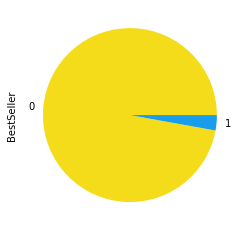

In [44]:
# Show the Frequency of the Best Sellers items with PIE visualization -------------------------------------------------------------------------------

counts = df["BestSeller"].value_counts()
p = df["BestSeller"].value_counts(normalize = True) * 100
index = [0,1]
FrequencyDF = pd.DataFrame({"BestSeller" : index,"Frequency": counts, "p" : p})
print(FrequencyDF)

myColors = ['#F5DC1A', '#179deb']
df['BestSeller'].value_counts().plot(kind = 'pie', colors = myColors)

# Checking for outliers products by price with an histogram

Text(0, 0.5, 'Amount')

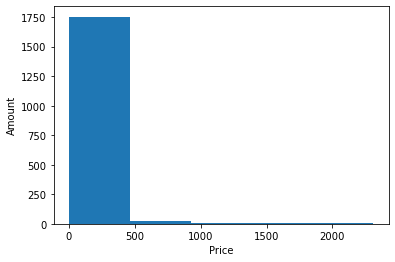

In [45]:
# We can see that most of the items in amazon are falling under the first section in the histogram price < 500 ------------------------------------------------

import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline

plt.hist(df.Price, bins = 5)
plt.xlabel("Price")
plt.ylabel("Amount")

# Let's check if the products above 700 USD are Best Selleers

In [46]:
# Code if price > 700 check if item is bestseller

# What is the amount of outliers products in Price ?
# All the products with a price above 700 USD
# We can see in the boxplot all 31 outliers

31


c:\Users\Yaniv\anaconda3\envs\datascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

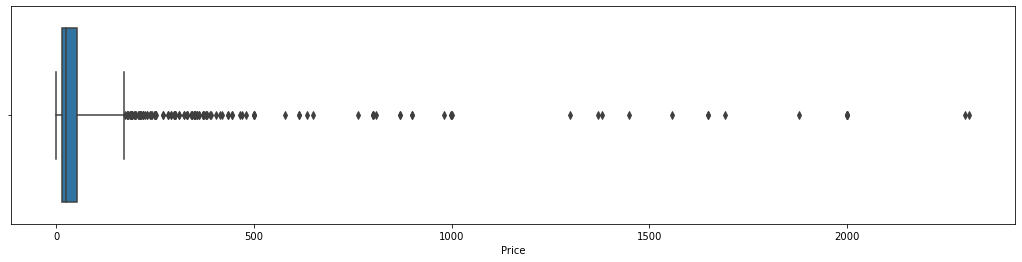

In [47]:
print(sum(df.Price > 700))
fig = plt.figure(figsize=(18,4))
sns.boxplot(df.Price, whis=3)

# Checking the outliers with IQR variable

In [48]:
Q1 = np.percentile(df["Price"], 25)
Q3 = np.percentile(df["Price"], 75)
IQR = Q3 - Q1

fareOutlierRows = df[(df["Price"] < Q1 - 1.5 * IQR) | (df["Price"] > Q3 + 1.5 * IQR )].index

print("The amount of outliers by IQR : " + str(len(fareOutlierRows)))

z_price = (df['Price'] - df['Price'].mean()) / df['Price'].std()
outliers = abs(z_price) > 3
print("We found that there are " + str(sum(outliers)) + " items above 700 USD")

min(df.Price[outliers])
df.Price[df.Price > 700] = np.nan
df = df.dropna(axis=0, thresh=8)
df["Price"].describe()

The amount of outliers by IQR : 268
We found that there are 31 items above 700 USD


C:\Users\Yaniv\AppData\Local\Temp/ipykernel_32620/1306250314.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Price[df.Price > 700] = np.nan


count    1765.000000
mean       54.319258
std        83.235565
min         0.000000
25%        13.580000
50%        24.950000
75%        49.990000
max       649.000000
Name: Price, dtype: float64

# After droping all prices outliers we can see the new boxplot

c:\Users\Yaniv\anaconda3\envs\datascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

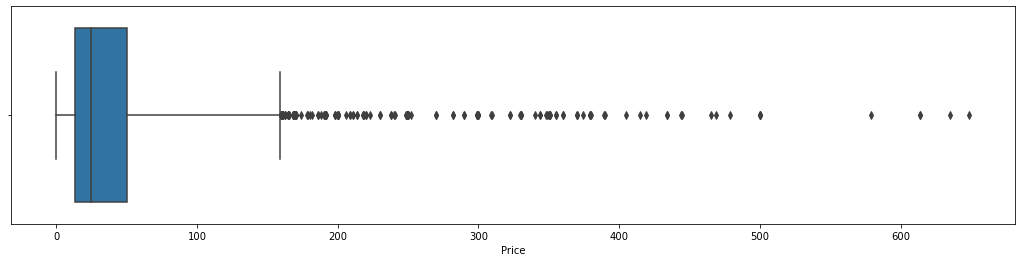

In [49]:
fig = plt.figure(figsize=(18,4))
sns.boxplot(df.Price, whis=3)

In [50]:
# Run this code for more than 1 column

# mycols = ["Price"]

# allOutliersRows = list()

# for col in mycols :
#     Q1 = np.percentile(df[col], 25)
#     Q3 = np.percentile(df[col], 75)
#     IQR = Q3 - Q1
#     IQRRange = 1.5 * IQR

#     colOutlier = df[(df[col] < Q1 - IQRRange) | (df[col] > Q3 + IQRRange)].index
#     allOutliersRows.extend(colOutlier)

# print(len(allOutliersRows))


# Correlation - Best Seller -> Comments

Text(0, 0.5, 'Comments')

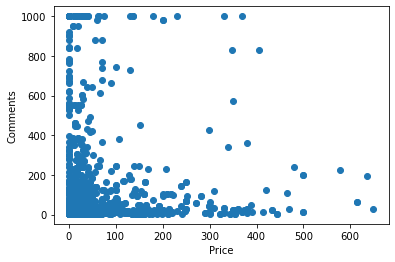

In [51]:
plt.scatter(df.Price, df.Comments)
plt.xlabel("Price")
plt.ylabel("Comments")

# We don't see any linear pattern between prices and amount of comments on an item
# but we can see that items with price > 400 usd has less amount of comments generally.

# Scaterring - Best Seller -> Rating

c:\Users\Yaniv\anaconda3\envs\datascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BestSeller', ylabel='Rating'>

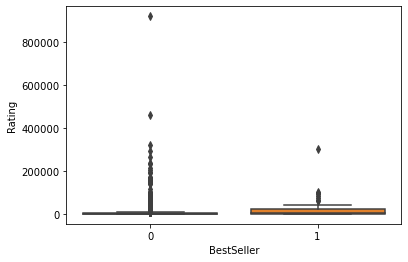

In [52]:
sns.boxplot(df.BestSeller, df.Rating)

# Here we can see that the amount of people rating products doesn't affect if an item is a best seller or not

# correlation - Best Seller -> Stars

In [53]:
ct1 = pd.crosstab(df["Stars"], df["BestSeller"])
ct1

BestSeller,0,1
Stars,,
1.0,1,0
2.1,2,0
2.8,2,0
3.0,2,0
3.2,1,0
3.3,2,0
3.4,5,0
3.5,1,0
3.6,10,3


# We can see that almost all Best Seller items must have above 4.0 stars

Text(0, 0.5, 'Best Seller')

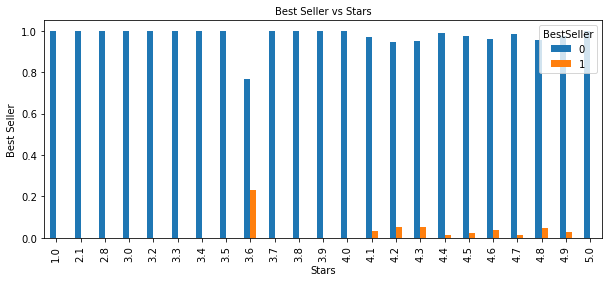

In [54]:
ct2 = pd.crosstab(df["Stars"], df["BestSeller"], normalize="index")
ct2.plot(kind = 'bar', figsize = (10,4))
plt.title('Best Seller vs Stars', fontsize = 10)
plt.xlabel('Stars')
plt.ylabel('Best Seller')

# We found that there is some correlation, if an item has above 4.0 Stars it can be a Best Seller
# Let's chack that assumption with the - Chi Test -

# H0 = There is no correlation between Best Seller and Stars

In [55]:
from scipy.stats import chi2_contingency
chi2_contingency(ct1)

(34.691372745578114,
 0.041718436247238026,
 22,
 array([[9.71104816e-01, 2.88951841e-02],
        [1.94220963e+00, 5.77903683e-02],
        [1.94220963e+00, 5.77903683e-02],
        [1.94220963e+00, 5.77903683e-02],
        [9.71104816e-01, 2.88951841e-02],
        [1.94220963e+00, 5.77903683e-02],
        [4.85552408e+00, 1.44475921e-01],
        [9.71104816e-01, 2.88951841e-02],
        [1.26243626e+01, 3.75637394e-01],
        [1.65087819e+01, 4.91218130e-01],
        [1.06821530e+01, 3.17847025e-01],
        [3.10753541e+01, 9.24645892e-01],
        [5.24396601e+01, 1.56033994e+00],
        [6.21507082e+01, 1.84929178e+00],
        [9.03127479e+01, 2.68725212e+00],
        [1.34012465e+02, 3.98753541e+00],
        [2.47631728e+02, 7.36827195e+00],
        [2.82591501e+02, 8.40849858e+00],
        [2.71909348e+02, 8.09065156e+00],
        [2.54429462e+02, 7.57053824e+00],
        [1.49550142e+02, 4.44985836e+00],
        [7.28328612e+01, 2.16713881e+00],
        [9.71104816e+00, 2.

# P value < 0.05 therefore H0 is wrong and we do have a connection between Best Seller and Stars and we pick the H1

<AxesSubplot:xlabel='Price', ylabel='Stars'>

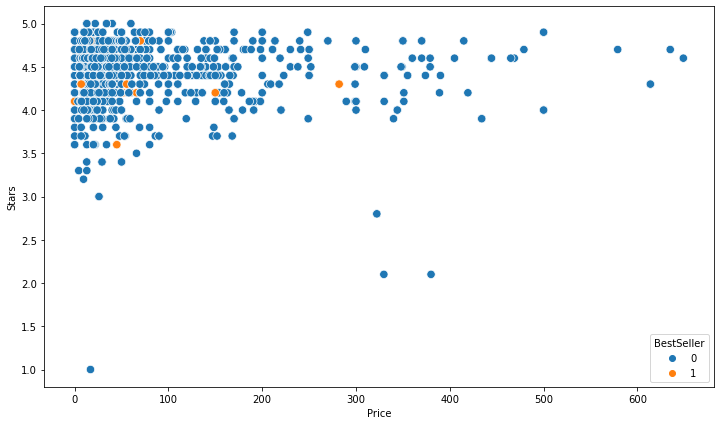

In [56]:
fig = plt.figure(figsize = (12,7))
sns.scatterplot(x = 'Price', y = 'Stars', s = 70, hue = 'BestSeller', data = df)

# Here we see that if the price is low the item will be a best seller

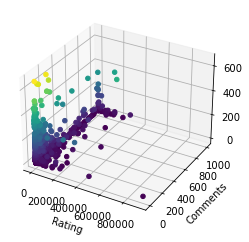

In [57]:
from mpl_toolkits.mplot3d import Axes3D
ax = plt.axes(projection = '3d')

xdata = df.Rating
ydata = df.Comments
zdata = df.Price

plt.xlabel('Rating')
plt.ylabel('Comments')

ax.scatter3D(xdata,ydata,zdata,c = zdata,depthshade = False)

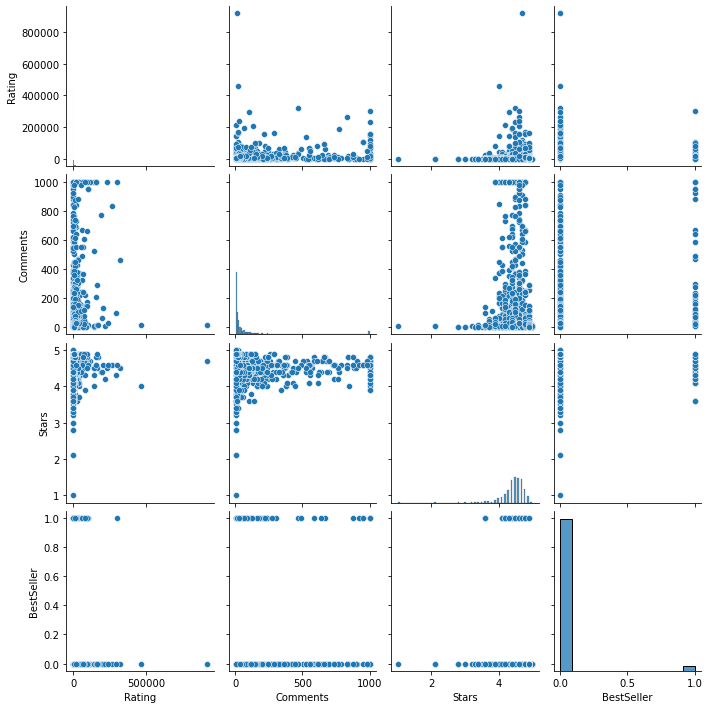

In [58]:
sns.pairplot(df[['Rating', 'Comments', 'Stars', 'BestSeller']])